<h1 style="color: #5E9BB5; text-transform: uppercase; font-size: 2em; letter-spacing: 2px;">Trabajo práctico integrador</h1>

<h1 style="color: #5C374C; font-variant: small-caps; font-size: 2.7em">Alcances del proyecto</h1>
<p style="text-align: justify; font-family: Cambria; font-size: 1.2em;">En este proyecto vamos a integrar tres sets de datos con lista de vendedores, lista de artículos y registro de operaciones de una empresa que vende insumos informáticos y posee clientes en varios países de América Latina. <br/> 
El siguiente reporte nos ayudarán a responder a las preguntas:

<ol style="text-align: justify; font-family: Cambria; padding-top: 10px;">
<li style="font-size: 1.2em">¿Cuál es el artículo más vendido? (por unidades)</li>
<li style="font-size: 1.2em">¿Qué artículo es el que más ingresos nos proporcionó?</li>
<li style="font-size: 1.2em">¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</li>
<li style="font-size: 1.2em">¿Hay grandes variaciones en ventas a lo largo del mes?</li>
<li style="font-size: 1.2em">¿Cuál país es nuestro mejor comprador?</li>
<li style="font-size: 1.2em">¿Cuál es la distribución de la venta de artículos a lo largo del mes?</li>
<li style="font-size: 1.2em">¿Cuáles son los productos más vendidos a nuestros mejores compradores?</li>
</ol>
</p>



<img src="https://cdn.discordapp.com/attachments/949032958457704488/998385062603145336/logo3.png"/>

<h1>Technical</h1>


<h2>Imports, connection & exploration of DFs</h2>

In [1]:
!pip install openpyxl==3.0.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 17.1 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# IMPORTS
import numpy as np
import pandas as pd
import sqlite3 as sql3
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# CONECTING DATAFRAMES
# articles
conn = sql3.connect('/work/data/articles.db')
sql_query = pd.read_sql_query('SELECT * FROM articles', conn)
df_articles = pd.DataFrame(sql_query, columns=['article_id', 'article_name', 'unit_price'])

# sellers
df_sellers = pd.read_excel('/work/data/sellers.xlsx', index_col=0)

# orders
df_orders = pd.read_csv('/work/data/orders.csv')

In [4]:
# EXPLORING DF_ARTICLES
print('Showing Data')
print(df_articles.head())
print('\nDataframe shape')
print(df_articles.shape)
print('\nNull value search')
print(df_articles.isnull().sum())
print('\nData type by column')
print(df_articles.dtypes)

# warning! in df_articles unit_price is an object. needs to be changed to float.

Showing Data
   article_id article_name unit_price
0       20015   Smartphone     525.00
1       20016      Full Pc    2127.81
2       20017      Monitor     230.00
3       20018       Tablet     130.00
4       20019         Desk     130.10

Dataframe shape
(31, 3)

Null value search
article_id      0
article_name    0
unit_price      0
dtype: int64

Data type by column
article_id       int64
article_name    object
unit_price      object
dtype: object


In [5]:
# EXPLORING DF_SELLERS
print('Showing Data')
print(df_sellers.head())
print('\nDataframe shape')
print(df_sellers.shape)
print('\nNull value search')
print(df_sellers.isnull().sum())
print('\nData type by column')
print(df_sellers.dtypes)

Showing Data
                 seller_name
seller_id                   
1           Aveline Swanwick
2                   Jase Doy
3          Oliviero Charkham
4           Cornie Wynrehame
5                Ewell Peres

Dataframe shape
(15, 1)

Null value search
seller_name    0
dtype: int64

Data type by column
seller_name    object
dtype: object


In [6]:
# EXPLORING DF_ORDERS
print('Showing Data')
print(df_orders.head())
print('\nDataframe shape')
print(df_orders.shape)
print('\nNull value search')
print(df_orders.isnull().sum())
print('\nData type by column')
print(df_orders.dtypes)

Showing Data
   order_id  week  article_id  quantity  seller_id country_name
0     15024     1       20039        10         10         Peru
1     15025     1       20029        15          5         Peru
2     15026     1       20024         5         14      Bolivia
3     15027     1       20018         9         14       Brazil
4     15028     1       20035         6         15       Mexico

Dataframe shape
(1000, 6)

Null value search
order_id        0
week            0
article_id      0
quantity        0
seller_id       0
country_name    0
dtype: int64

Data type by column
order_id         int64
week             int64
article_id       int64
quantity         int64
seller_id        int64
country_name    object
dtype: object


In [7]:
# PREPARING DATA 
# Changing unit_price to float
df_articles['unit_price'] = df_articles['unit_price'].astype(float)
print(df_articles.dtypes)

article_id        int64
article_name     object
unit_price      float64
dtype: object


<h2>Pipeline</h2>

In [8]:
# PIPELINES
#copying df_orders
my_df = df_orders.copy()
print(my_df)

#change the index of df_articles
df_articles.set_index('article_id', inplace=True)

     order_id  week  article_id  quantity  seller_id country_name
0       15024     1       20039        10         10         Peru
1       15025     1       20029        15          5         Peru
2       15026     1       20024         5         14      Bolivia
3       15027     1       20018         9         14       Brazil
4       15028     1       20035         6         15       Mexico
..        ...   ...         ...       ...        ...          ...
995     16019     4       20021         1          7       Brazil
996     16020     4       20040        15         15       Brazil
997     16021     4       20040         2         11     Colombia
998     16022     4       20018        14         11       Brazil
999     16023     4       20026        12          9       Brazil

[1000 rows x 6 columns]


In [9]:
#adding 3 columns
my_df = my_df.assign(article_name = my_df['article_id'])
my_df = my_df.assign(total_amount = my_df['article_id'])
my_df = my_df.assign(seller_name = my_df['seller_id'])
print(my_df)

     order_id  week  article_id  quantity  seller_id country_name  \
0       15024     1       20039        10         10         Peru   
1       15025     1       20029        15          5         Peru   
2       15026     1       20024         5         14      Bolivia   
3       15027     1       20018         9         14       Brazil   
4       15028     1       20035         6         15       Mexico   
..        ...   ...         ...       ...        ...          ...   
995     16019     4       20021         1          7       Brazil   
996     16020     4       20040        15         15       Brazil   
997     16021     4       20040         2         11     Colombia   
998     16022     4       20018        14         11       Brazil   
999     16023     4       20026        12          9       Brazil   

     article_name  total_amount  seller_name  
0           20039         20039           10  
1           20029         20029            5  
2           20024         2002

In [10]:
print(df_articles.head())

           article_name  unit_price
article_id                         
20015        Smartphone      525.00
20016           Full Pc     2127.81
20017           Monitor      230.00
20018            Tablet      130.00
20019              Desk      130.10


In [11]:
#replacing values in new columns
#print(len(my_df.index))

for i in range(len(my_df.index)):
    article = df_articles.loc[my_df.loc[i]['article_id']]['article_name']
    #my_df.loc[i]['article_name']
    my_df.loc[i,'article_name'] = article
    my_df.loc[i,'total_amount'] = df_articles.loc[my_df.loc[i]['article_id']]['unit_price'] * my_df.loc[i,'quantity']
    my_df.loc[i,'seller_name'] = df_sellers.loc[my_df.loc[i]['seller_name']]['seller_name']

my_df.drop(['order_id', 'article_id','seller_id'], axis='columns', inplace=True)
print(my_df)

     week  quantity country_name   article_name  total_amount      seller_name
0       1        10         Peru  Water Cooling         675.0  Cirilo Grandham
1       1        15         Peru          Mouse         454.5      Ewell Peres
2       1         5      Bolivia        Netbook         725.0   Janel O'Curran
3       1         9       Brazil         Tablet        1170.0   Janel O'Curran
4       1         6       Mexico           Case         227.4  Daisie Slograve
..    ...       ...          ...            ...           ...              ...
995     4         1       Brazil          Modem          67.5       Kati Innot
996     4        15       Brazil       Heatsink         150.0  Daisie Slograve
997     4         2     Colombia       Heatsink          20.0  Vasily Danilyuk
998     4        14       Brazil         Tablet        1820.0  Vasily Danilyuk
999     4        12       Brazil            SDD         264.0     Onida Cosely

[1000 rows x 6 columns]


<h1>Questions</h1>


In [12]:
# *** Global settings ***
# Fonts

h3font = {
    'fontname':'DejaVu Sans',
    'size'   : 14,
}
h2font = {
    'fontname':'DejaVu Serif',
    'size'   : 18 ,
}
h1font = {
    'fontname':'DejaVu Serif',
    'size'   : 22,
}

# Grid
sns.set_style("whitegrid")
plt.rcParams["axes.grid.axis"] ="y"
plt.rcParams["axes.grid"] = True

<h3 style="color: #5C374C; font-variant: small-caps; font-size: 2em">1. ¿Cuáles son los artículos más vendidos?</h3>
<p style="text-align: justify; font-family: Cambria; font-size: 1.2em;">De acuerdo la siguiente tabla, los artículos más vendidos son HDDs, Tablets y SDDs mientras que los menos vendidos son Fan Coolers, Keyboards y Wi-Fi Cards. La diferencia puede deberse a la demanda de insumos de almacenamiento a causa del constante incremento de datos a almacenar. En cambio, los insumos menos comprados son generalmente de baja utilidad o de mayor durabilidad.</p>


In [13]:
my_df2=my_df.groupby('article_name').sum()
por_cant = my_df2.sort_values('quantity', ascending=False)
#print(por_cant['quantity'].head(1))

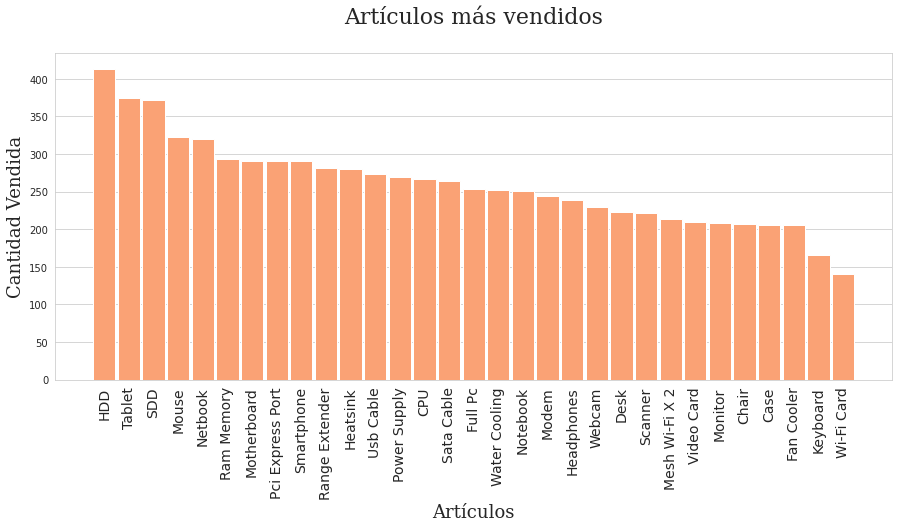

In [14]:
plt.figure(figsize=(15,6))

plt.bar(
    por_cant.index,
    por_cant['quantity'],
    width=0.9,
    #linewidth = 0.6,
    color=['#FAA275'],
    #bottom=20,
    #edgecolor=['#7A4562'],
    align='center'
    )

plt.xticks(rotation=90, **h3font )
plt.title('Artículos más vendidos', **h1font, pad=30)
plt.xlabel('Artículos', **h2font)
plt.ylabel('Cantidad Vendida', **h2font)

plt.show()

<h3 style="color: #5C374C; font-variant: small-caps; font-size: 2em">2. ¿Qué artículo es el que más ingresos nos proporcionó?</h3>
<p style="text-align: justify; font-family: Cambria; font-size: 1.2em;">El siguiente gráfico nos muestra los artículos que nos proporcionan más ingresos, los cuales individualmente son más caros. Se debería promocionar más la venta de Full PC ya que es el artículo que más ingresos genera. De hecho, nos aporta 50% más de ingreso que nuestro segundo producto más caro, las Notebooks.</p>

In [15]:
df3=(my_df.groupby('article_name').sum()).sort_values('total_amount', ascending=False).head(5)
#print(df3['total_amount'])

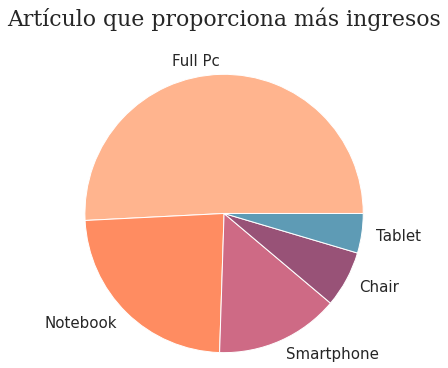

In [16]:
plt.rcParams['font.size'] = 15

plt.pie(
    x=df3['total_amount'], 
    labels=df3.index,
    #shadow=True,
    #frame=True,
    labeldistance=1.1,
    radius=1.6,
    colors=['#FFB48E', '#FF8C61', '#CE6A85', '#985277', '#5E9BB5'],
    )

plt.title('Artículo que proporciona más ingresos', pad=80, **h1font)
plt.xticks(**h3font)
plt.show()


<h3 style="color: #5C374C; font-variant: small-caps; font-size: 2em">3. ¿A qué vendedor debe otorgarse el bono por "Mejor Vendedor del Mes"?</h3>
<p style="text-align: justify; font-family: Cambria; font-size: 1.2em;">El bono a "Mejor Vendedor del Mes" debería otorgarse a Janel O'Curran, quien ha vendido notablemente más que el resto de los empleados. Su logro se podría premiar con algún incentivo fuera monetario o material.  
</p>

In [17]:
df4 = (my_df.groupby('seller_name').sum()).sort_values('total_amount', ascending=False)
#print(df4[['quantity']+['total_amount']])

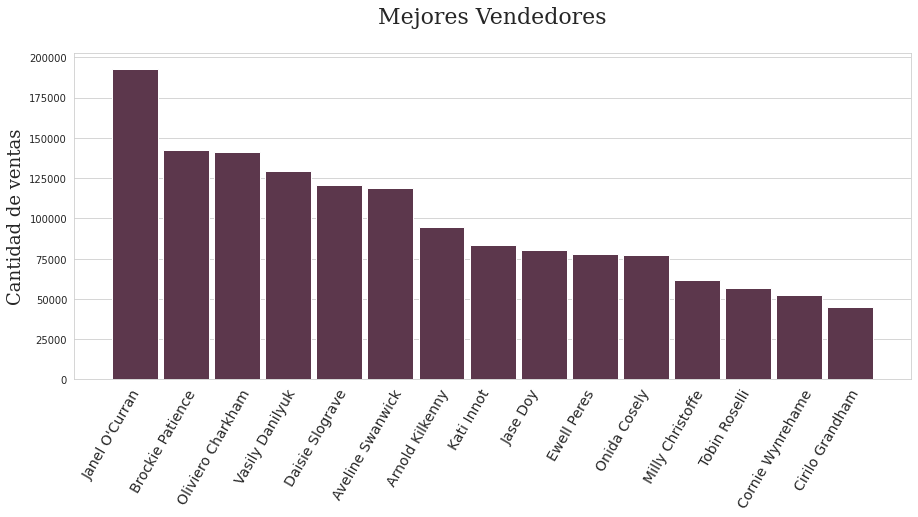

In [18]:
plt.rcParams['font.size'] = 10

plt.figure(figsize=(15,6))

plt.bar(
    df4.index, 
    df4['total_amount'],
    color=['#5C374C'],
    width=0.9,
    align='edge'
    )

plt.xticks(rotation=60, **h3font)
plt.ylabel('Cantidad de ventas', **h2font)
plt.title('Mejores Vendedores', **h1font, pad=30)
plt.show()

<h3 style="color: #5C374C; font-variant: small-caps; font-size: 2em">4. ¿Hay grandes variaciones en ventas a lo largo del mes?</h3>
<h4 style="font-family: Cambria;">De ser así, ¿cuándo deberían lanzarse más campañas?</h4>
<p style="text-align: justify; font-family: Cambria; font-size: 1.2em;">Como demuestra el siguiente gráfico, las ventas decrecen a fin de mes debido a los patrones de compra de los clientes en los países de la muestra. Este patrón puede deberse a que los compradores prefieren utilizar su dinero apenas se encuentre disponible por razones de la economía de los mismos. Para incrementar las ventas a final de mes puede ofrecerse promociones, descuentos o planes de financiamiento para beneficiar a los clientes.</p>

In [19]:
df5 = (my_df.groupby('week').sum()).sort_values('total_amount', ascending=False)
#print(df5)

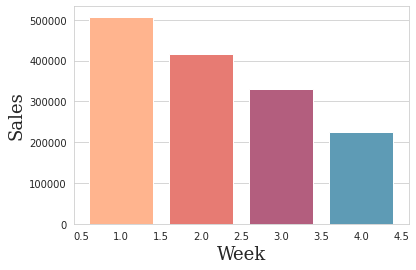

In [20]:

plt.bar(
    df5.index, 
    df5['total_amount'],
    color=['#FFB48E', '#E77B73','#B35E7E','#5E9BB5']  
    )
plt.ylabel('Sales', **h2font)
plt.xlabel('Week', **h2font)
plt.show()


<h3 style="color: #5C374C; font-variant: small-caps; font-size: 2em">5. ¿Qué país es nuestro mejor comprador?</h3>
<p style="text-align: justify; font-family: Cambria; font-size: 1.2em;">Como demuestra el gráfico, nuestro mayor comprador es Brasil, seguido por Perú y Argentina. Puede deberse a campañas de marketing más intensivas en Brasil (siendo un país con mayor población). Estas campañas podrían replicarse en Perú y Argentina para percibir más ventas.</p>

In [21]:
my_dfcountry=my_df.groupby('country_name').sum()
por_cantcountry= my_dfcountry.sort_values('quantity', ascending=False)
por_cantcountry=por_cantcountry.reset_index()
#print(por_cantcountry)

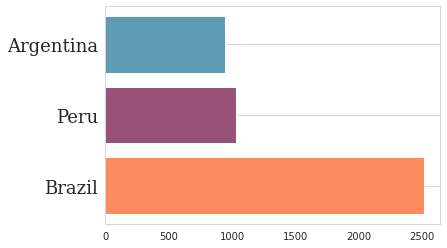

In [22]:
countrylist=['Brazil', 'Peru', 'Argentina']
por_cantcountrytop=por_cantcountry[por_cantcountry['country_name'].isin(countrylist)]

plt.barh(
    por_cantcountrytop['country_name'],
    por_cantcountrytop['quantity'],
    color=['#FF8C61','#985277', '#5E9BB5']
)

plt.yticks(**h2font)
plt.show()

<h3 style="color: #5C374C; font-variant: small-caps; font-size: 2em">6. ¿Cuál es la distribución de la venta de artículos por semana?</h3>
<p style="text-align: justify; font-family: Cambria; font-size: 1.2em;">El siguiente gráfico demuestra la variación de la venta de artículos por semana, tomando en cuenta los artículos más vendidos. Nuestro artículo más vendido son las HDD, sin embargo la venta de las mismas decrece a partir de la tercera semana. El segundo artículo más vendido son las Tablets las cuales alcanzan el máximo de ventas en la tercer semana para luego decrecer abruptamente. El tercer artículo más vendido son las SDD y su venta decrece de forma constante a partir de la primera semana.  <br/>
En conclusión, podríamos promocionar el artículo correspondiente cuando decrezca su venta. 
</p>

In [23]:
#selecting top 3 articles
df_top3_articles = my_df[(my_df["article_name"] == "HDD")|
(my_df["article_name"] == "Tablet")|
(my_df["article_name"] == "SDD")]
#print(df_top3_articles)

df_topart_amountsold=df_top3_articles.groupby(['week', 'article_name']).sum()
df_topart_amountsold=df_topart_amountsold.reset_index() #reseting this column since catplot couldn't interpret it as an index 
df_topart_amountsold = df_topart_amountsold.sort_values('quantity', ascending=False)
#print(df_topart_amountsold)

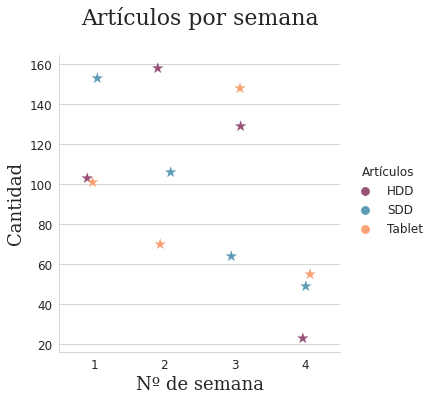

In [24]:
plt.rcParams['font.size'] = 12

g = sns.catplot(
    x='week',
    y='quantity',
    hue='article_name',
    data=df_topart_amountsold,
    palette=['#985277', '#5E9BB5', '#FAA275'],
    marker='*',
    s = 12,
    facet_kws={'legend_out': False},
    linestyle='-'
)

plt.title('Artículos por semana', **h1font, pad=30)
plt.xlabel('Nº de semana', **h2font)
plt.ylabel('Cantidad', **h2font)

new_title = 'Artículos'
g._legend.set_title(new_title)

plt.show()

<h3 style="color: #5C374C; font-variant: small-caps; font-size: 2em">7. ¿Cuál es la proporcion de ventas de los productos que mas ingresos generan en el top 3 países compradores? </h3>
<p style="text-align: justify; font-family: Cambria; font-size: 1.2em;">Este gráfico muestra los artículos que generan mayores ingresos en nuestro top 3 de países compradores. <br/>
Es necesario destacar que el producto que mayor ingreso genera (Full PC) no figura en esta lista. Sin embargo, un producto similar (CPU) tiene ventas significativas en los tres países. Esto puede deberse a una mayor conveniencia para el cliente al comprar una CPU antes que una PC completa. Fuera por la diferencia de precio o la inflexibilidad sobre los componentes de una PC completa. Podría ofrecerse opciones de seleccionar componentes en este tipo de producto para aumentar sus ventas.<br/>
Con respecto al resto de los productos, puede ser beneficioso lanzar campañas publicitarias que apunten a estos productos para aumentar o mantener las ventas. 
</p>

In [25]:
mostsold_pcountry = my_df[((my_df['country_name'] == 'Brazil')|(my_df['country_name'] == 'Peru')|(my_df['country_name'] == 'Argentina')) & ((my_df['article_name'] =='CPU')|(my_df['article_name'] =='Notebook')|(my_df['article_name'] =='Smartphone')|(my_df['article_name'] =='Chair'))]
#print(mostsold_pcountry)

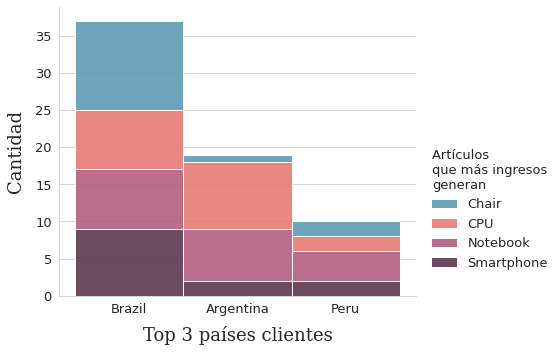

In [26]:
palette = ["#5E9BB5", "#E77B73", "#B35E7E", "#5C374C"]
plt.rcParams['font.size'] = 13
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['legend.frameon'] = False

t = sns.displot(
    mostsold_pcountry, 
    x='country_name', 
    hue='article_name', 
    multiple="stack",
    palette=sns.color_palette(palette, len(palette)),
    alpha=0.9,
    facet_kws={'legend_out': False},
    aspect=1.2
    )

sns.move_legend(t, "upper right",  bbox_to_anchor=(1.3, 0.6))
new_title2 = 'Artículos \nque más ingresos\ngeneran'
t._legend.set_title(new_title2)

plt.ylabel('Cantidad', **h2font)
plt.xlabel('Top 3 países clientes', **h2font)
plt.show()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=afb15344-a8b6-4a8e-9cea-c0ea9f6893d8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>